## Step 1 - Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Load Dataset

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Step 3 - Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


## Step 3 - Feature Separation

In [7]:
X = df.drop("label", axis=1)
y = df["label"]

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Step 4 - Feature Standardization 

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "=" * 70)
print("1. MODEL kNN DENGAN SEMUA FITUR (BASELINE)")
print("=" * 70)

# Model baseline dengan k=5
knn_baseline = KNeighborsClassifier(n_neighbors=5)
knn_baseline.fit(X_train_scaled, y_train)
y_pred_baseline = knn_baseline.predict(X_test_scaled)

print(
    f"\nAkurasi dengan semua fitur (k=5): {accuracy_score(y_test, y_pred_baseline):.4f}"
)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))


1. MODEL kNN DENGAN SEMUA FITUR (BASELINE)

Akurasi dengan semua fitur (k=5): 0.9763

Classification Report:
              precision    recall  f1-score   support

      female       0.99      0.97      0.98       317
        male       0.97      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## Step 5 - Feature Selection 


2. SELEKSI FITUR TERBAIK

Ranking Fitur Berdasarkan ANOVA F-Score:
     Feature        Score
12   meanfun  5697.873718
5        IQR  1566.488204
3        Q25   890.387180
8     sp.ent   794.113490
1         sd   750.762545
9        sfm   375.206538
0   meanfreq   324.436358
11  centroid   324.436358
2     median   218.279695
16    mindom   100.408598
17    maxdom    96.538999
18   dfrange    93.040538
15   meandom    89.236907
10      mode    76.078004
14    maxfun    69.673401
13    minfun    47.370855
7       kurt    19.327736
4        Q75    11.306350
6       skew     3.812982
19   modindx     2.112229


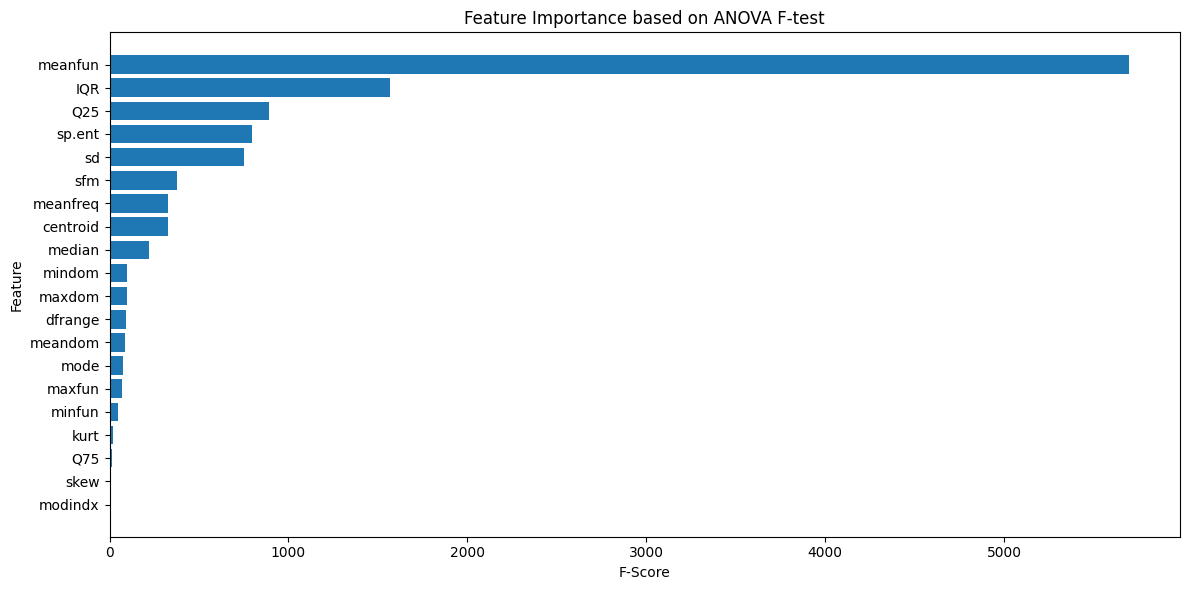

Jumlah Fitur:  5 -> Akurasi: 0.9811
Jumlah Fitur:  6 -> Akurasi: 0.9858
Jumlah Fitur:  7 -> Akurasi: 0.9826
Jumlah Fitur:  8 -> Akurasi: 0.9811
Jumlah Fitur:  9 -> Akurasi: 0.9858
Jumlah Fitur: 10 -> Akurasi: 0.9842
Jumlah Fitur: 11 -> Akurasi: 0.9748
Jumlah Fitur: 12 -> Akurasi: 0.9748
Jumlah Fitur: 13 -> Akurasi: 0.9732
Jumlah Fitur: 14 -> Akurasi: 0.9748
Jumlah Fitur: 15 -> Akurasi: 0.9763
Jumlah Fitur: 16 -> Akurasi: 0.9779
Jumlah Fitur: 17 -> Akurasi: 0.9779
Jumlah Fitur: 18 -> Akurasi: 0.9779
Jumlah Fitur: 19 -> Akurasi: 0.9779
Jumlah Fitur: 20 -> Akurasi: 0.9763


In [9]:
print("\n" + "=" * 70)
print("2. SELEKSI FITUR TERBAIK")
print("=" * 70)

# Metode 1: SelectKBest dengan ANOVA F-test
selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X_train_scaled, y_train)

# Dapatkan skor fitur
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_,
}).sort_values("Score", ascending=False)

print("\nRanking Fitur Berdasarkan ANOVA F-Score:")
print(feature_scores)

# Visualisasi skor fitur
plt.figure(figsize=(12, 6))
plt.barh(feature_scores["Feature"], feature_scores["Score"])
plt.xlabel("F-Score")
plt.ylabel("Feature")
plt.title("Feature Importance based on ANOVA F-test")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

# Uji berbagai jumlah fitur terbaik
k_features_range = range(5, 21)
accuracies_by_features = []

for k_feat in k_features_range:
    # Pilih k fitur terbaik
    selector_k = SelectKBest(score_func=f_classif, k=k_feat)
    X_train_selected = selector_k.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector_k.transform(X_test_scaled)

    # Train model dengan k=5
    knn_temp = KNeighborsClassifier(n_neighbors=5)
    knn_temp.fit(X_train_selected, y_train)
    y_pred_temp = knn_temp.predict(X_test_selected)

    acc = accuracy_score(y_test, y_pred_temp)
    accuracies_by_features.append(acc)
    print(f"Jumlah Fitur: {k_feat:2d} -> Akurasi: {acc:.4f}")

### Step 5A - Plot Accuracy VS Total Feature

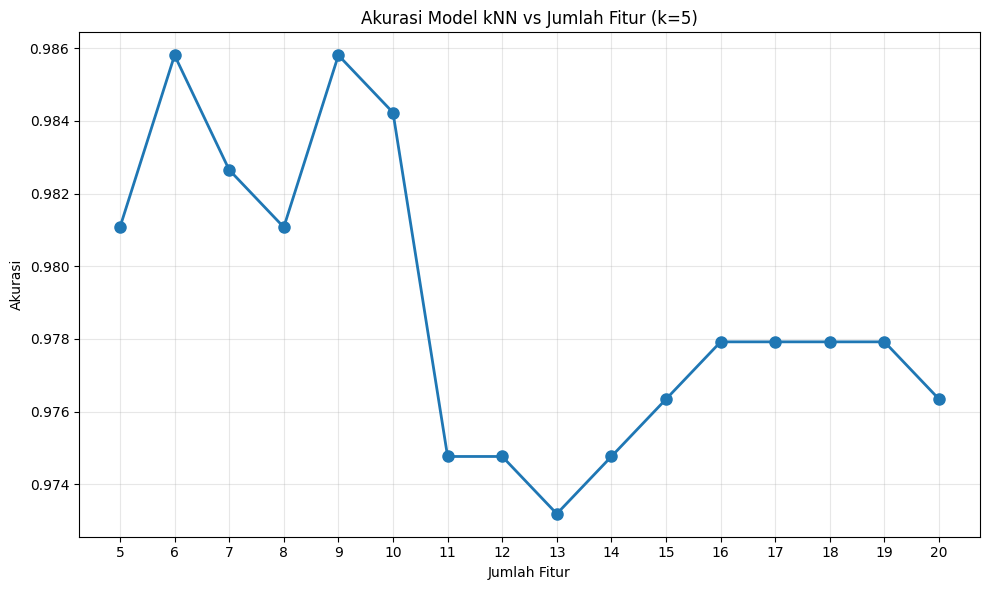

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(
    k_features_range, accuracies_by_features, marker="o", linewidth=2, markersize=8
)
plt.xlabel("Jumlah Fitur")
plt.ylabel("Akurasi")
plt.title("Akurasi Model kNN vs Jumlah Fitur (k=5)")
plt.grid(True, alpha=0.3)
plt.xticks(k_features_range)
plt.tight_layout()
plt.savefig("accuracy_vs_features.png", dpi=300, bbox_inches="tight")
plt.show()

### Step 5B - Choosing Optimal Feature

In [11]:
optimal_num_features = k_features_range[np.argmax(accuracies_by_features)]
print(f"\n>>> Jumlah Fitur Optimal: {optimal_num_features}")
print(f">>> Akurasi Maksimal: {max(accuracies_by_features):.4f}")


>>> Jumlah Fitur Optimal: 6
>>> Akurasi Maksimal: 0.9858


### Step 5C - Gather Best Feature

In [12]:
selector_optimal = SelectKBest(score_func=f_classif, k=optimal_num_features)
X_train_optimal = selector_optimal.fit_transform(X_train_scaled, y_train)
X_test_optimal = selector_optimal.transform(X_test_scaled)

selected_features = X.columns[selector_optimal.get_support()].tolist()
print(f"\nFitur-fitur yang Dipilih ({optimal_num_features} fitur):")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")


Fitur-fitur yang Dipilih (6 fitur):
1. sd
2. Q25
3. IQR
4. sp.ent
5. sfm
6. meanfun


## Step 6 - Finding The Best K

k= 1 -> Train Acc: 1.0000, Test Acc: 0.9858
k= 2 -> Train Acc: 0.9858, Test Acc: 0.9842
k= 3 -> Train Acc: 0.9862, Test Acc: 0.9874
k= 4 -> Train Acc: 0.9858, Test Acc: 0.9858
k= 5 -> Train Acc: 0.9834, Test Acc: 0.9858
k= 6 -> Train Acc: 0.9834, Test Acc: 0.9858
k= 7 -> Train Acc: 0.9826, Test Acc: 0.9811
k= 8 -> Train Acc: 0.9834, Test Acc: 0.9826
k= 9 -> Train Acc: 0.9807, Test Acc: 0.9779
k=10 -> Train Acc: 0.9818, Test Acc: 0.9811
k=11 -> Train Acc: 0.9807, Test Acc: 0.9795
k=12 -> Train Acc: 0.9811, Test Acc: 0.9779
k=13 -> Train Acc: 0.9791, Test Acc: 0.9779
k=14 -> Train Acc: 0.9803, Test Acc: 0.9763
k=15 -> Train Acc: 0.9783, Test Acc: 0.9763
k=16 -> Train Acc: 0.9787, Test Acc: 0.9795
k=17 -> Train Acc: 0.9767, Test Acc: 0.9779
k=18 -> Train Acc: 0.9751, Test Acc: 0.9763
k=19 -> Train Acc: 0.9743, Test Acc: 0.9763
k=20 -> Train Acc: 0.9728, Test Acc: 0.9763
k=21 -> Train Acc: 0.9724, Test Acc: 0.9763
k=22 -> Train Acc: 0.9720, Test Acc: 0.9763
k=23 -> Train Acc: 0.9720, Test 

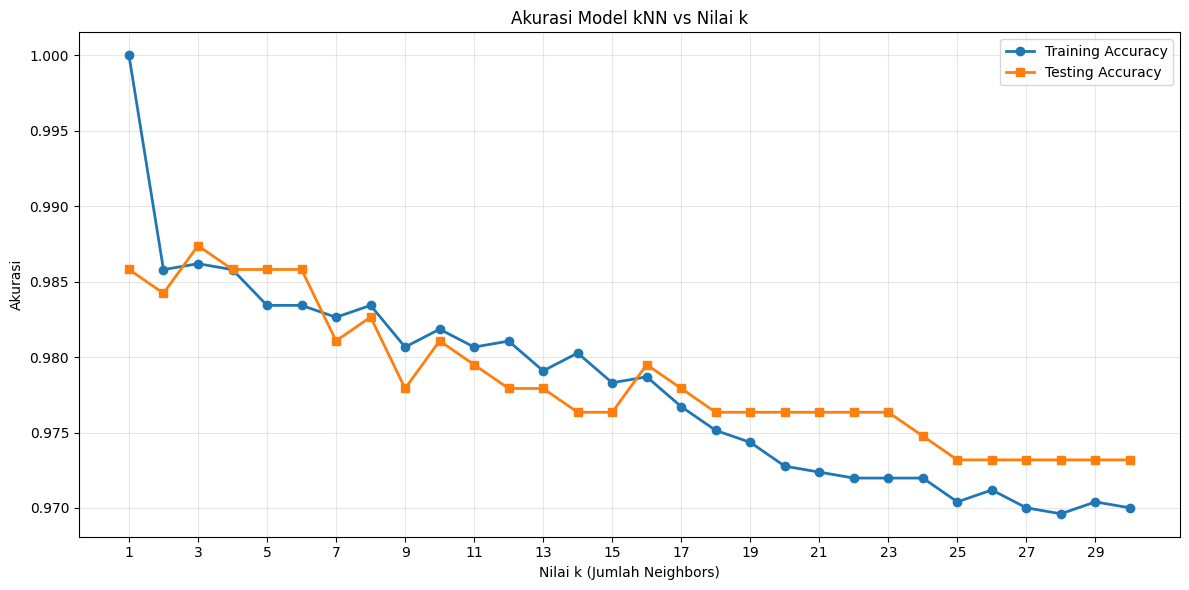


>>> Nilai k Terbaik: 3
>>> Akurasi Testing Terbaik: 0.9874


In [13]:
k_range = range(1, 31)
train_accuracies = []
test_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_optimal, y_train)

    # Akurasi training
    train_pred = knn.predict(X_train_optimal)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)

    # Akurasi testing
    test_pred = knn.predict(X_test_optimal)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

    print(f"k={k:2d} -> Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Plot akurasi vs nilai k
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_accuracies, marker="o", label="Training Accuracy", linewidth=2)
plt.plot(k_range, test_accuracies, marker="s", label="Testing Accuracy", linewidth=2)
plt.xlabel("Nilai k (Jumlah Neighbors)")
plt.ylabel("Akurasi")
plt.title("Akurasi Model kNN vs Nilai k")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.savefig("accuracy_vs_k.png", dpi=300, bbox_inches="tight")
plt.show()

# Nilai k terbaik
optimal_k = k_range[np.argmax(test_accuracies)]
best_test_accuracy = max(test_accuracies)

print(f"\n>>> Nilai k Terbaik: {optimal_k}")
print(f">>> Akurasi Testing Terbaik: {best_test_accuracy:.4f}")

## Step 7 - Final Model with Optimal Parameter


Parameter Model Final:
- Jumlah Fitur: 6
- Nilai k: 3
- Akurasi: 0.9874

Classification Report:
              precision    recall  f1-score   support

      female       0.99      0.99      0.99       317
        male       0.99      0.99      0.99       317

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



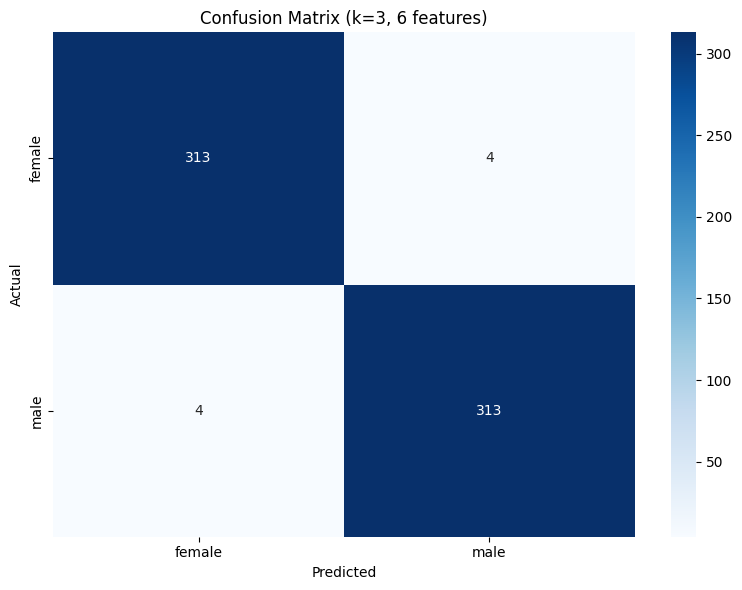


Jumlah Kesalahan Prediksi: 8
Persentase Error: 1.26%


In [14]:
# Train model final
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_optimal, y_train)
y_pred_final = knn_final.predict(X_test_optimal)

print(f"\nParameter Model Final:")
print(f"- Jumlah Fitur: {optimal_num_features}")
print(f"- Nilai k: {optimal_k}")
print(f"- Akurasi: {accuracy_score(y_test, y_pred_final):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['female', 'male'], 
            yticklabels=['female', 'male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (k={optimal_k}, {optimal_num_features} features)')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Error Analysis
error_indices = np.where(y_test.values != y_pred_final)[0]
print(f"\nJumlah Kesalahan Prediksi: {len(error_indices)}")
print(f"Persentase Error: {len(error_indices)/len(y_test)*100:.2f}%")

## Step 8 - Conclusion and Analysis Result

In [15]:
print("\n" + "=" * 70)
print("RINGKASAN HASIL")
print("=" * 70)
print(f"""
HASIL EKSPERIMEN KLASIFIKASI SUARA (Male vs Female)

1. BASELINE (Semua 20 Fitur, k=5):
   Akurasi: {accuracy_score(y_test, y_pred_baseline):.4f}

2. FITUR OPTIMAL:
   Jumlah Fitur Terbaik: {optimal_num_features}
   Fitur yang Dipilih: {", ".join(selected_features)}
   Akurasi dengan Fitur Optimal (k=5): {accuracies_by_features[optimal_num_features - 5]:.4f}

3. NILAI k OPTIMAL:
   k Terbaik: {optimal_k}
   Akurasi Testing: {best_test_accuracy:.4f}
   
4. MODEL FINAL:
   - Menggunakan {optimal_num_features} fitur terpilih
   - Nilai k = {optimal_k}
   - Akurasi = {accuracy_score(y_test, y_pred_final):.4f}
   - Peningkatan dari baseline: {(accuracy_score(y_test, y_pred_final) - accuracy_score(y_test, y_pred_baseline)) * 100:.2f}%
""")



RINGKASAN HASIL

HASIL EKSPERIMEN KLASIFIKASI SUARA (Male vs Female)

1. BASELINE (Semua 20 Fitur, k=5):
   Akurasi: 0.9763

2. FITUR OPTIMAL:
   Jumlah Fitur Terbaik: 6
   Fitur yang Dipilih: sd, Q25, IQR, sp.ent, sfm, meanfun
   Akurasi dengan Fitur Optimal (k=5): 0.9858

3. NILAI k OPTIMAL:
   k Terbaik: 3
   Akurasi Testing: 0.9874

4. MODEL FINAL:
   - Menggunakan 6 fitur terpilih
   - Nilai k = 3
   - Akurasi = 0.9874
   - Peningkatan dari baseline: 1.10%

